In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# List of required columns
required_columns = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

# Load the CSV
df = pd.read_csv(
    'q_quora.csv',
    usecols=required_columns,
    dtype={'id': int, 'qid1': int, 'qid2': int, 'question1': str, 'question2': str, 'is_duplicate': str},
    on_bad_lines='skip',         # skips badly formatted lines (Pandas 1.3+)
    low_memory=False
)


In [3]:
df.shape

(404351, 6)

In [4]:
df['is_duplicate'].unique()

array(['0', '1',
       'Do bullets travel faster than the speed of sound when shot from a gun? If not, is it possible? If they do, what gun and how much devastation occurs?',
       'My sister told my crush that I like her without me asking her to do so. What should I do now?',
       ' how would this change the plot for the whole RR story?',
       'What were the greatest achievements of the Persian Empire?',
       'What are the best places to visit in Japan to get a feel for their latest technological advancements?',
       'My boyfriend wants to have sex with me . And I have mixed feelings regarding that. Should I do it or not ?',
       ' mass communication or pharmacy?',
       'What if we are actually moving back in time? Can one differentiate a backward flow of time from forward flow?',
       "I am in love with my classmate, I am gay and he's straight, what should I do?",
       'Does Donald Trump get to deduct his campaign expenses from his taxes?',
       ' 2) share bonanza

In [5]:
df = df[df['is_duplicate'].isin(['0', '1'])]

# Convert is_duplicate to int
df['is_duplicate'] = df['is_duplicate'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404015 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404015 non-null  int64 
 1   qid1          404015 non-null  int64 
 2   qid2          404015 non-null  int64 
 3   question1     404014 non-null  object
 4   question2     404013 non-null  object
 5   is_duplicate  404015 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [7]:
new_df = df.sample(30000,random_state=2)

In [8]:
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241             Is Michelle Obama a transgender person?   
185512  What's the main reason behind 500 & 1000 rs no...   
178179  Why England is not returning Kohinoor Diamond ...   
366934  What will a career in NABARD be like? How is i...   
215887  Which MBA college should I opt for in Asia wit...   

                                                question2  is_duplicate  
95241   What are the most attractive photos of Michell...             0  
185512  Why are 500 and 1000 notes being banned in India?             1  
178179  Why won't Britain return the Koh-i-Noor Diamon...             1  
366934  Is an engineer eligible for the NABARD assista...             0  
215887  Which colleges can I get into with 770 GMAT sc...             0

In [9]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [10]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [11]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [12]:
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  
95241   what are the most attractive photos of michell...             0  
185512     why are 500 and 1k notes being banned in india             1  
178179  why will not britain return the koh i noor dia...             1  
366934  is an engineer eligible for the nabard assista...             0  
215887  which colleges can i get into with 770 gmat score             0

In [13]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
95241       38      53             6             9  
185512     132      46            28            10  
178179      59      59            10            12  
366934     120      61            25            10  
215887      67      49            15            10

In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [16]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
95241       38      53             6             9            2  
185512     132      46            28            10            5  
178179      59      59            10            12            5  
366934     120      61            25            10            2  
215887      67      49            15            10            5

In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [18]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
95241       38      53             6             9            2          15  
185512     132      46            28            10            5          33  
178179      59      59            10            12            5          22  
366934     120      61            25            10            2          31  
215887      67      49            15            10            5          25

In [19]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
95241       38      53             6             9            2          15   
185512     132      46            28            10            5          33   
178179      59      59            10            12            5          22   
366934     120      61            25            10            2          31   
215887      67      49            15            10            5          25   

        word_share  
95241         0.13  
185512        0.15  
178179        0.23  
366934        0.06  
215887        0.20

In [39]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [41]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [43]:
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
95241       38      53             6             9  ...          15   
185512     132      46            28            10  ...          33   
178179      59      59            10            12  ...          22   
366934     120      61            25            10  ...          31   
215887      67      49            15            10  ...          25   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
95241         0.13  0.499988  0.499988  0.000000  0.000000  0.333328   
185512        0.15  0.799984  0.285712  0.199996  0.124998  0.499995   
178179        0.23  0.333328  0.333328  0.749981  0.499992  0.499995   
366934        0.06  0.166664  0.099999  0.249994  0.099999  0.199998   
215887        0.20  0.399992  0.285710  0.599988  0.374995  0.499995   

         ctc_max  last_word_eq  first_word_eq  
95241   0.222220           0.0            0.0  
185512  0.208332           1.0            0.0  
178179  0.416663           1.0            1.0  
366934  0.086956           0.0            0.0  
215887  0.333331           0.0            1.0  

[5 rows x 21 columns]

In [47]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 982.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=85a404bfc2d962558fb05f02482a2e360666e6fe94a25440ffde276636239bf9
  Stored in directory: /Users/joel/Library/Caches/pip/wheels/24/a8/58/407063d8e5c1d4dd6594c99d12baa0108570b56a92325587dd
Successfully built distance


In [53]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    length_features = [0.0] * 3
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features


In [55]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [57]:
new_df.head()

id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
95241       38      53             6             9  ...  0.499988  0.000000   
185512     132      46            28            10  ...  0.285712  0.199996   
178179      59      59            10            12  ...  0.333328  0.749981   
366934     120      61            25            10  ...  0.099999  0.249994   
215887      67      49            15            10  ...  0.285710  0.599988   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
95241   0.000000  0.333328  0.222220           0.0            0.0   
185512  0.124998  0.499995  0.208332           1.0            0.0   
178179  0.499992  0.499995  0.416663           1.0            1.0   
366934  0.099999  0.199998  0.086956           0.0            0.0   
215887  0.374995  0.499995  0.333331           0.0            1.0   

        abs_len_diff  mean_len  longest_substr_ratio  
95241              3       7.5              0.384615  
185512            14      17.0              0.234043  
178179             2      11.0              0.216667  
366934            13      16.5              0.145161  
215887             5      12.5              0.220000  

[5 rows x 24 columns]

In [59]:
!pip install fuzzywuzzy

In [61]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [63]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [64]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
95241    95241  189061  189062   
185512  185512  366337  366338   
178179  178179  351959  351960   
366934  366934  718195  718196   
215887  215887  425692  425693   

                                                question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  is_duplicate  \
95241   what are the most attractive photos of michell...             0   
185512     why are 500 and 1k notes being banned in india             1   
178179  why will not britain return the koh i noor dia...             1   
366934  is an engineer eligible for the nabard assista...             0   
215887  which colleges can i get into with 770 gmat score             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
95241       38      53             6             9  ...  0.222220   
185512     132      46            28            10  ...  0.208332   
178179      59      59            10            12  ...  0.416663   
366934     120      61            25            10  ...  0.086956   
215887      67      49            15            10  ...  0.333331   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
95241            0.0            0.0             3       7.5   
185512           1.0            0.0            14      17.0   
178179           1.0            1.0             2      11.0   
366934           0.0            0.0            13      16.5   
215887           0.0            1.0             5      12.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
95241               0.384615          37                  55   
185512              0.234043          43                  67   
178179              0.216667          71                  71   
366934              0.145161          36                  43   
215887              0.220000          66                  63   

        token_sort_ratio  token_set_ratio  
95241                 53               54  
185512                44               63  
178179                73               78  
366934                34               35  
215887                71               71  

[5 rows x 28 columns]

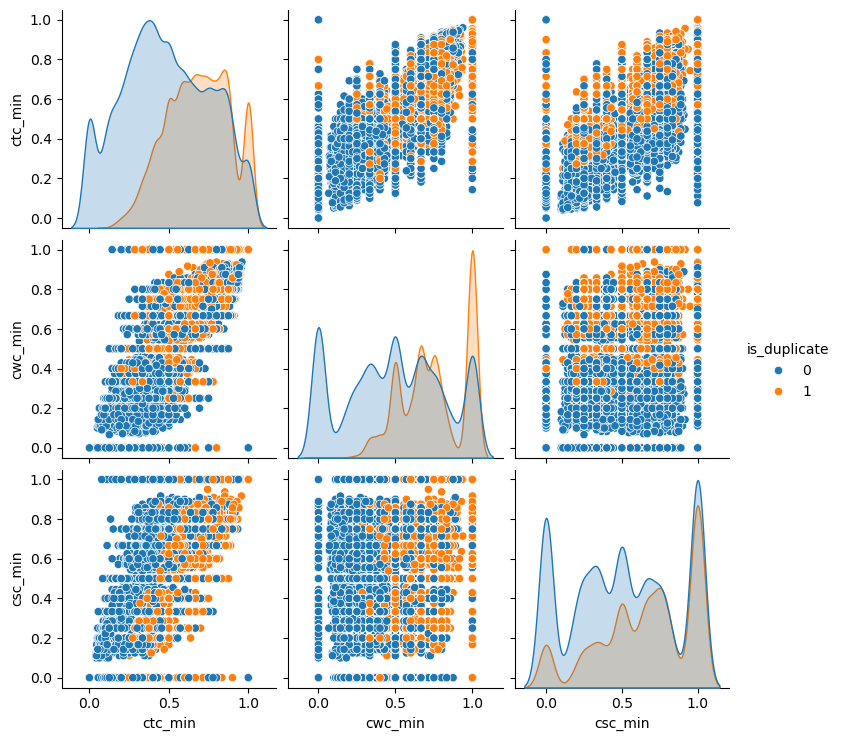

In [67]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

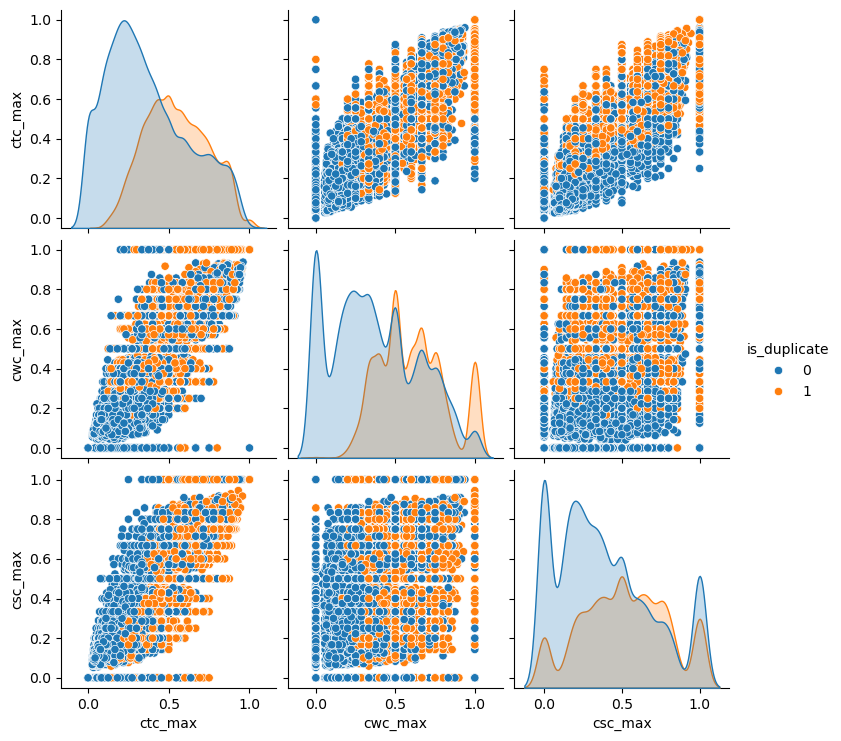

In [69]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

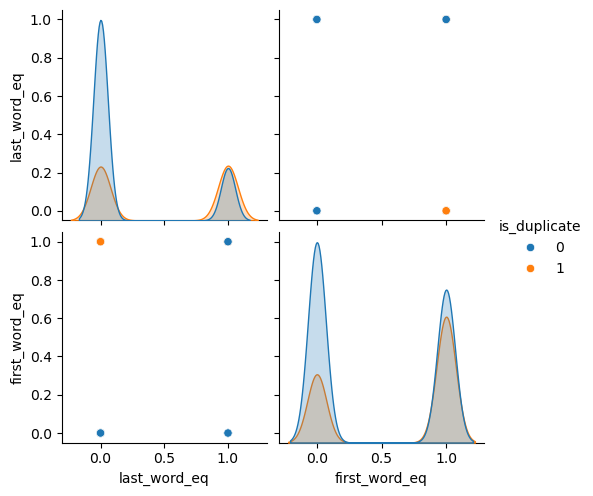

In [71]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

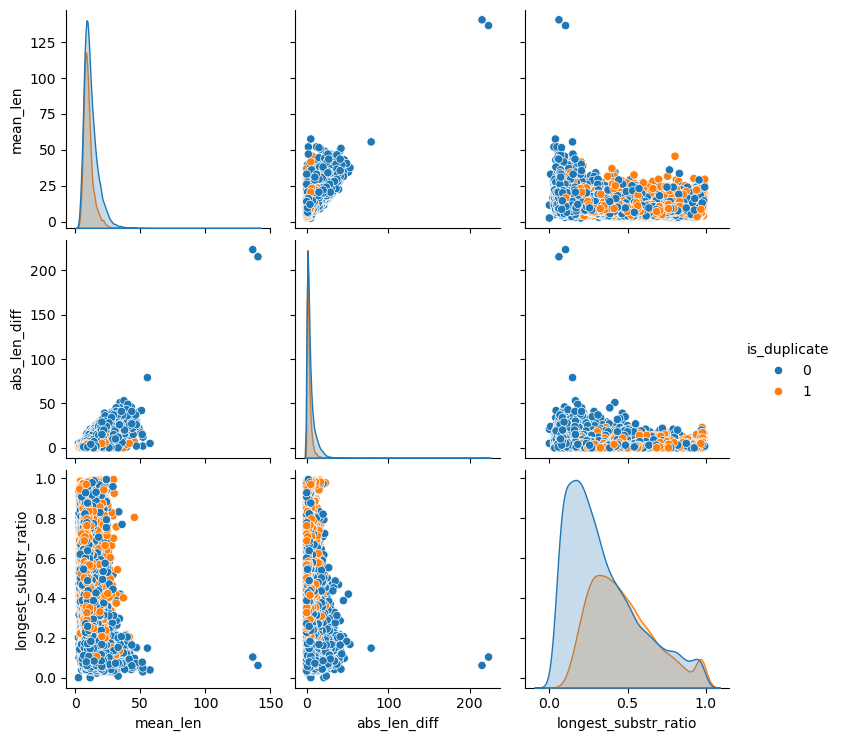

In [73]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

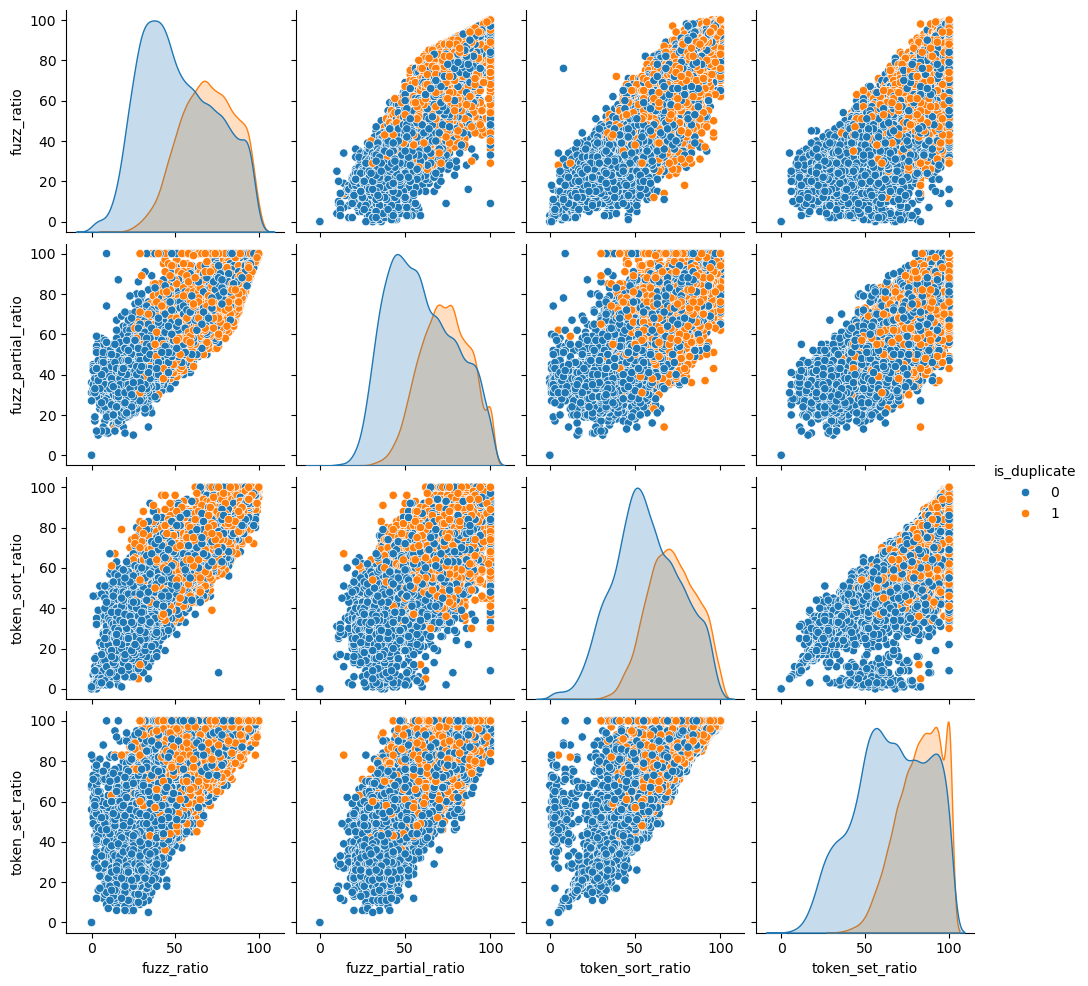

In [75]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [77]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [79]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.015s...
[t-SNE] Computed neighbors for 30000 samples in 1.970s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

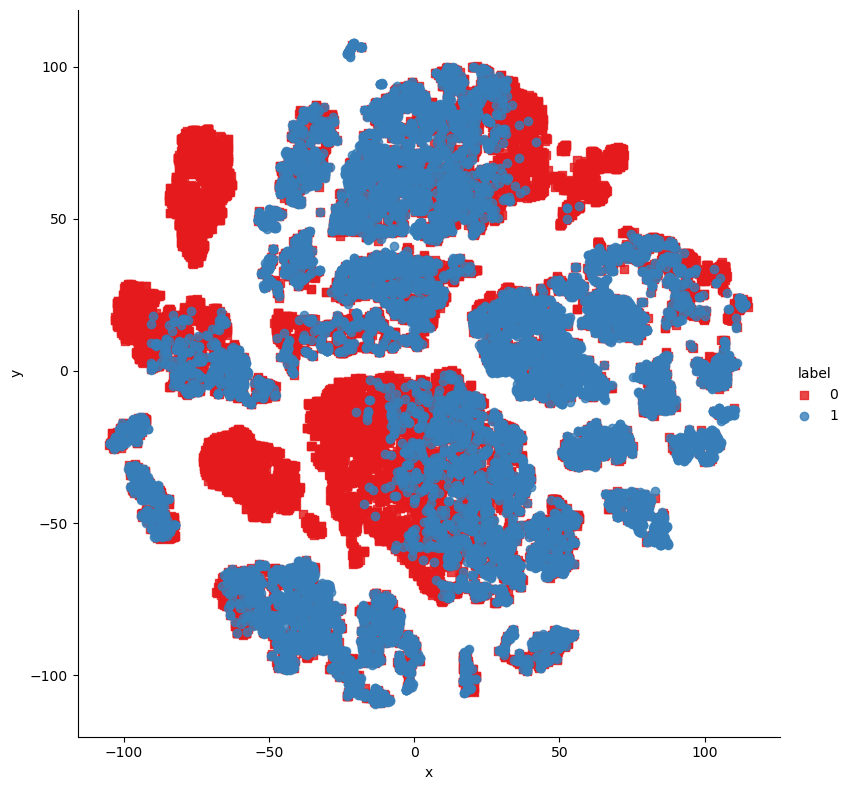

In [83]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,
           height=8, palette="Set1", markers=['s', 'o'])


In [85]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.026s...
[t-SNE] Computed neighbors for 30000 samples in 2.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

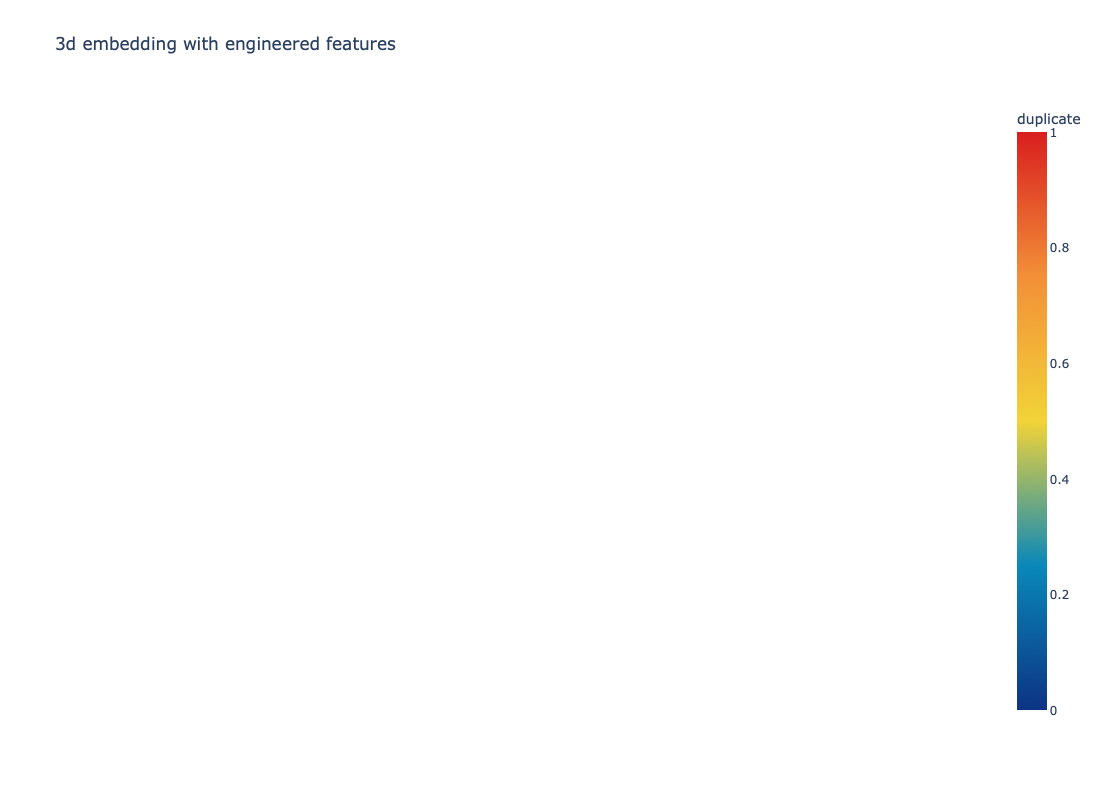

In [87]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [89]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
95241              is michelle obama a transgender person   
185512  what is the main reason behind 500   1k rs not...   
178179  why england is not returning kohinoor diamond ...   
366934  what will a career in nabard be like  how is i...   
215887  which mba college should i opt for in asia wit...   

                                                question2  
95241   what are the most attractive photos of michell...  
185512     why are 500 and 1k notes being banned in india  
178179  why will not britain return the koh i noor dia...  
366934  is an engineer eligible for the nabard assista...  
215887  which colleges can i get into with 770 gmat score

In [91]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
95241              0      38      53             6             9            2   
185512             1     132      46            28            10            5   
178179             1      59      59            10            12            5   
366934             0     120      61            25            10            2   
215887             0      67      49            15            10            5   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
95241           15        0.13  0.499988  0.499988  ...  0.222220   
185512          33        0.15  0.799984  0.285712  ...  0.208332   
178179          22        0.23  0.333328  0.333328  ...  0.416663   
366934          31        0.06  0.166664  0.099999  ...  0.086956   
215887          25        0.20  0.399992  0.285710  ...  0.333331   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
95241            0.0            0.0             3       7.5   
185512           1.0            0.0            14      17.0   
178179           1.0            1.0             2      11.0   
366934           0.0            0.0            13      16.5   
215887           0.0            1.0             5      12.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
95241               0.384615          37                  55   
185512              0.234043          43                  67   
178179              0.216667          71                  71   
366934              0.145161          36                  43   
215887              0.220000          66                  63   

        token_sort_ratio  token_set_ratio  
95241                 53               54  
185512                44               63  
178179                73               78  
366934                34               35  
215887                71               71  

[5 rows x 23 columns]

In [97]:
import numpy as np	
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [99]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [101]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
95241              0      38      53             6             9            2   
185512             1     132      46            28            10            5   
178179             1      59      59            10            12            5   
366934             0     120      61            25            10            2   
215887             0      67      49            15            10            5   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
95241           15        0.13  0.499988  0.499988  ...     0     0     0   
185512          33        0.15  0.799984  0.285712  ...     0     0     0   
178179          22        0.23  0.333328  0.333328  ...     0     0     0   
366934          31        0.06  0.166664  0.099999  ...     0     0     0   
215887          25        0.20  0.399992  0.285710  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
95241      0     0     0     0     0     0     0  
185512     0     0     0     0     0     0     0  
178179     0     0     0     0     0     0     0  
366934     0     0     0     0     0     0     0  
215887     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7871666666666667

In [115]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7966666666666666

In [107]:
from sklearn.metrics import confusion_matrix

In [117]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3196,  574],
       [ 703, 1527]])

In [119]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3172,  598],
       [ 622, 1608]])

In [137]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [139]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [141]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [143]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [145]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [147]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [149]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [155]:
rf.predict(query_point_creator(q1,q2))

array([0])

In [153]:
cv

CountVectorizer(max_features=3000)

In [157]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))